In [120]:
# Import necessary libraries, and read results from csv file into the df data frame.

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

df = pd.read_csv('./developer_survey_2019/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [121]:
# define functions that will be used

# Function split_string takes a string and returns a list with strings seperated by the character ';'

def split_string(s):
    
    return s.split(';')

# Function single_responses takes response_list object, iterates through it, adding the the list of responses to the item
# list, and returns a set of the responses in the items list.

def single_responses(response_list):

    items = []
    for i in response_list:

        items.extend(split_string(i)) 

    return set(items)

# Function find_string takes the the particular string it is counting 'string', and the column object of
# response answers. It iterates through the object, checking if the particular string is in that
# row, and if it is found it increases the count. When finished it returns the total count.

def find_string(string, answer_string):
    count = 0
        
    for x in answer_string:

        if string in x:
            count += 1
            
    return count

# Function response_counter takes the list of unique single responses and the column object of
# response answers. It iterates through the list of unique responses, passes the single string and
# response answers to the find_string function, and records the tuple list with the response and count.
# The tuple list is then returned once all the single unique responses are counted.

def response_counter(unique_responses, complete_responses):
    
    results_list = []
    
    for response in unique_responses:
        results_list.append([response, find_string(response, complete_responses)])
        
    return results_list


In [122]:
# PART 1 - Job and Career Satisfaction by country

df.groupby('Country')['Respondent'].nunique()

Country
Afghanistan                              44
Albania                                  86
Algeria                                 134
Andorra                                   7
Angola                                    5
                                       ... 
Venezuela, Bolivarian Republic of...     88
Viet Nam                                231
Yemen                                    19
Zambia                                   12
Zimbabwe                                 39
Name: Respondent, Length: 179, dtype: int64

Text(0, 0.5, 'Proportion')

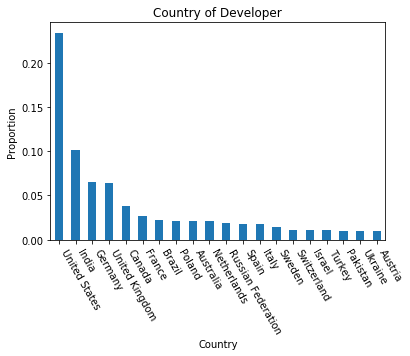

In [123]:
Country_responses = df.Country.dropna()
    
Countries = single_responses(Country_responses)

Countries_df = pd.DataFrame(response_counter(Countries, Country_responses), columns =['Country', 'Count'])

Countries_df = Countries_df.sort_values(by=['Count'], ascending=False)

Countries_df.set_index('Country', inplace=True)

(Countries_df.head(20)/Countries_df.sum()).plot(kind="bar", legend = False);

plt.title("Country of Developer")
plt.xticks(rotation=-60, ha='left')
plt.ylabel("Proportion")

In [124]:
Countries_df.columns = ['Count']
Countries_df

,Count
Country,
United States,20949
India,9061
Germany,5866
United Kingdom,5737
Canada,3395
...,...
Saint Vincent and the Grenadines,1
Chad,1
Sao Tome and Principe,1


In [125]:
df.groupby('JobSat')['Respondent'].nunique(dropna=False)

JobSat
Neither satisfied nor dissatisfied     8720
Slightly dissatisfied                 10752
Slightly satisfied                    24207
Very dissatisfied                      4857
Very satisfied                        22452
Name: Respondent, dtype: int64

In [126]:
df['JobSat'].isnull().sum()

17895

In [127]:
def Sat_to_num(row, col):
    val = None
    if row[col] == 'Very dissatisfied':
        val = 0.0
    elif row[col] == 'Slightly dissatisfied':
        val = 1.0
    elif row[col] == 'Neither satisfied nor dissatisfied':
        val = 2.0
    elif row[col] == 'Slightly satisfied':
        val = 3.0
    elif row[col] == 'Very satisfied':
        val = 4.0
    return val
    
df['JobSat_num'] = df.apply(Sat_to_num, axis=1, col='JobSat')
df['CareerSat_num'] = df.apply(Sat_to_num, axis=1, col='CareerSat')

In [128]:
ordered_df = pd.DataFrame(df.groupby('Country')[['JobSat_num', 'CareerSat_num']].count())
ordered_df


,JobSat_num,CareerSat_num
Country,,
Afghanistan,25,27
Albania,70,72
Algeria,55,59
Andorra,3,4
Angola,1,2
...,...,...
"Venezuela, Bolivarian Republic of...",63,67
Viet Nam,142,148
Yemen,8,10


In [129]:
Countries_with_high_res = ordered_df.drop(ordered_df[(ordered_df.JobSat_num < 50) & (ordered_df.CareerSat_num < 50)].index)

In [130]:
Countries_with_high_res

,JobSat_num,CareerSat_num
Country,,
Albania,70,72
Algeria,55,59
Argentina,472,483
Armenia,73,74
Australia,1591,1627
...,...,...
United Kingdom,4867,4932
United States,17595,17998
Uruguay,101,103


In [131]:
Country_list = list(Countries_with_high_res.index.values)
len(Country_list)

89

In [132]:
High_res_countries_df = df[['Country', 'JobSat_num', 'CareerSat_num']][df['Country'].isin(Country_list) & pd.notnull(df['JobSat_num']) & pd.notnull(df['CareerSat_num'])]
High_res_countries_df.columns = ['Country', 'Job Satisfaction', 'Career Satisfaction']
Country_JobCareer_Sat = High_res_countries_df.groupby('Country').mean()
Country_JobCareer_Sat[Country_JobCareer_Sat.columns[0:1]].sort_values(by='Job Satisfaction', ascending=False).head(10)


,Job Satisfaction
Country,
Norway,3.042017
Malta,2.925926
Sweden,2.915799
Netherlands,2.906125
Finland,2.891832
United States,2.889230
Canada,2.887043
Estonia,2.886905
Denmark,2.874502


In [133]:
Country_JobCareer_Sat[Country_JobCareer_Sat.columns[0:1]].sort_values(by='Job Satisfaction', ascending=True).head(10)

,Job Satisfaction
Country,
Algeria,1.872727
Tunisia,1.971831
China,2.000000
Saudi Arabia,2.000000
Morocco,2.078947
Ecuador,2.114286
Ghana,2.142857
Taiwan,2.153285
Dominican Republic,2.179487


In [134]:
Country_JobCareer_Sat.filter(['Country', 'Career Satisfaction']).sort_values(by='Career Satisfaction', ascending=False).head(10)

,Career Satisfaction
Country,
United States,3.215970
Norway,3.199580
Malta,3.185185
Canada,3.137689
Sweden,3.116367
Finland,3.112583
Estonia,3.107143
Netherlands,3.093209
Lithuania,3.068966


In [135]:
Country_JobCareer_Sat.filter(['Country', 'Career Satisfaction']).sort_values(by='Career Satisfaction', ascending=True).head(10)

,Career Satisfaction
Country,
Algeria,1.927273
Tunisia,2.140845
China,2.210066
Morocco,2.223684
Saudi Arabia,2.275362
Viet Nam,2.380282
Taiwan,2.386861
Ecuador,2.428571
Indonesia,2.466276


In [136]:
# PART 2 - Job Attractors & Detractors

df.groupby('JobFactors')['Respondent'].nunique(dropna = False)

JobFactors
Diversity of the company or organization                                                                                           49
Diversity of the company or organization;Flex time or a flexible schedule                                                           1
Diversity of the company or organization;How widely used or impactful my work output would be                                       4
Diversity of the company or organization;How widely used or impactful my work output would be;Flex time or a flexible schedule    124
Financial performance or funding status of the company or organization                                                             71
                                                                                                                                 ... 
Specific department or team I'd be working on;Remote work options                                                                  10
Specific department or team I'd be working on;Remot

In [137]:
Job_Factors = df.JobFactors

Job_Factors.isna().sum()

9512

In [138]:
Job_Factors = Job_Factors.dropna()

In [139]:
Job_Factors

1        Financial performance or funding status of the...
2        Languages, frameworks, and other technologies ...
3        Languages, frameworks, and other technologies ...
4        Industry that I'd be working in;Languages, fra...
5        Financial performance or funding status of the...
                               ...                        
88326    Languages, frameworks, and other technologies ...
88327    Office environment or company culture;Remote w...
88328    Office environment or company culture;Diversit...
88329    Office environment or company culture;Remote w...
88330    Financial performance or funding status of the...
Name: JobFactors, Length: 79371, dtype: object

In [140]:
single_job_factors = single_responses(Job_Factors)
single_job_factors

{'Diversity of the company or organization',
 'Financial performance or funding status of the company or organization',
 'Flex time or a flexible schedule',
 'How widely used or impactful my work output would be',
 "Industry that I'd be working in",
 "Languages, frameworks, and other technologies I'd be working with",
 'Office environment or company culture',
 'Opportunities for professional development',
 'Remote work options',
 "Specific department or team I'd be working on"}

In [141]:
single_job_factors_df = pd.DataFrame(response_counter(single_job_factors, Job_Factors), columns =['Factors', 'Count'])
single_job_factors_df

,Factors,Count
0,"Languages, frameworks, and other technologies ...",42960
1,Opportunities for professional development,34533
2,Flex time or a flexible schedule,36200
3,How widely used or impactful my work output wo...,18637
4,Remote work options,25176
5,Specific department or team I'd be working on,10121
6,Industry that I'd be working in,11920
7,Office environment or company culture,38478
8,Financial performance or funding status of the...,10965
9,Diversity of the company or organization,5416


Text(0.5, 0, 'Proportion')

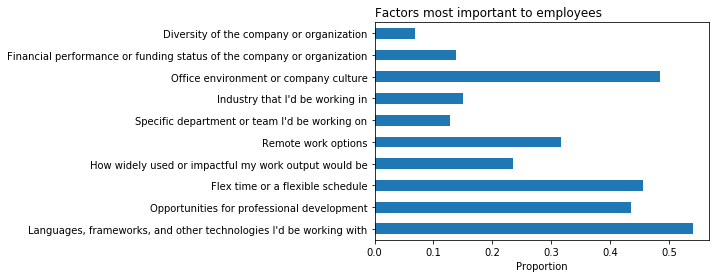

In [142]:
single_job_factors_df.set_index('Factors', inplace=True)

(single_job_factors_df/(len(Job_Factors))).plot(kind="barh", legend = False);
plt.title("Factors most important to employees", loc='left');
plt.ylabel("")
plt.xlabel("Proportion")

In [143]:
df.groupby('WorkChallenge')['Respondent'].nunique(dropna = False)

WorkChallenge
Being tasked with non-development work                                                                       994
Being tasked with non-development work;Distracting work environment                                          761
Being tasked with non-development work;Distracting work environment;Inadequate access to necessary tools     733
Being tasked with non-development work;Distracting work environment;Lack of support from management          882
Being tasked with non-development work;Distracting work environment;Meetings                                2318
                                                                                                            ... 
Not enough people for the workload;Time spent commuting;Toxic work environment                               207
Not enough people for the workload;Toxic work environment                                                    125
Time spent commuting                                                              

In [144]:
Challenges = df.WorkChallenge
Challenges

0                                                      NaN
1                                                      NaN
2        Distracting work environment;Inadequate access...
3                                                      NaN
4        Being tasked with non-development work;Inadequ...
                               ...                        
88878                                                  NaN
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882                                                  NaN
Name: WorkChallenge, Length: 88883, dtype: object

In [145]:
Challenges.isna().sum()

20742

In [146]:
Challenges = Challenges.dropna()

In [147]:
challenges_items = single_responses(Challenges)
challenges_items

{'Being tasked with non-development work',
 'Distracting work environment',
 'Inadequate access to necessary tools',
 'Lack of support from management',
 'Meetings',
 'Non-work commitments (parenting, school work, hobbies, etc.)',
 'Not enough people for the workload',
 'Time spent commuting',
 'Toxic work environment'}

In [148]:
Challenges_results_df = pd.DataFrame(response_counter(challenges_items, Challenges), columns =['Challenges', 'Count'])    
Challenges_results_df.set_index('Challenges', inplace=True)

In [149]:
Challenges_results_df

,Count
Challenges,
Inadequate access to necessary tools,14382
Time spent commuting,13983
Toxic work environment,14165
Being tasked with non-development work,24846
Distracting work environment,28491
Meetings,24961
Not enough people for the workload,22890
Lack of support from management,18110
"Non-work commitments (parenting, school work, hobbies, etc.)",13546


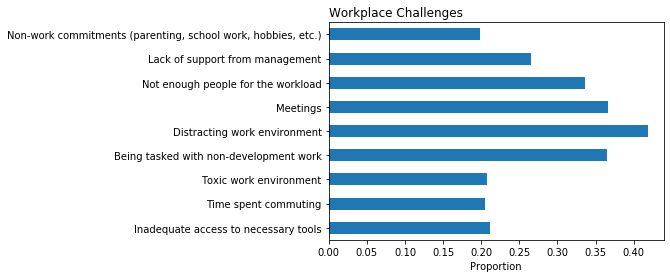

In [150]:
(Challenges_results_df/(len(Challenges))).plot(kind="barh", legend = False);
plt.title("Workplace Challenges", loc='left');
plt.ylabel("");
plt.xlabel("Proportion");